# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

## Exploratory data analysis

In [44]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


dfx = pd.read_excel("season2020-2021Spain.xlsx")
Crowd = dfx['Crowd']
New_Crowd = []
for i in Crowd : 
    New_Crowd.append(0)
dfx["Crowd"] = pd.DataFrame(np.array(New_Crowd))
df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         12379 non-null  object 
 1   #              11619 non-null  float64
 2   Nation         11619 non-null  object 
 3   Pos            11619 non-null  object 
 4   Age            11619 non-null  object 
 5   Min            12367 non-null  float64
 6   Gls            12379 non-null  int64  
 7   Ast            12379 non-null  int64  
 8   PK             12379 non-null  int64  
 9   PKatt          12379 non-null  int64  
 10  Sh             12379 non-null  int64  
 11  SoT            12379 non-null  int64  
 12  CrdY           12379 non-null  int64  
 13  CrdR           12379 non-null  int64  
 14  Touches        12367 non-null  float64
 15  Press          12367 non-null  float64
 16  Tkl            12367 non-null  float64
 17  Int            12379 non-null  int64  
 18  Blocks

In [45]:
#Visualizing the DF head (20 first elements)
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [46]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 0 to 12377
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         11498 non-null  object 
 1   #              11498 non-null  float64
 2   Nation         11498 non-null  object 
 3   Pos            11498 non-null  object 
 4   Age            11498 non-null  object 
 5   Min            11498 non-null  float64
 6   Gls            11498 non-null  int64  
 7   Ast            11498 non-null  int64  
 8   PK             11498 non-null  int64  
 9   PKatt          11498 non-null  int64  
 10  Sh             11498 non-null  int64  
 11  SoT            11498 non-null  int64  
 12  CrdY           11498 non-null  int64  
 13  CrdR           11498 non-null  int64  
 14  Touches        11498 non-null  float64
 15  Press          11498 non-null  float64
 16  Tkl            11498 non-null  float64
 17  Int            11498 non-null  int64  
 18  Blocks

In [48]:
players = pd.read_csv('fifa20-21.csv')

modified_teams =  {
 'Deportivo Alavés': 'Alavés',
 'Cádiz CF': 'Cádiz',
 'Getafe CF': 'Getafe',
 'Real Betis': 'Real Betis',
 'Sevilla FC': 'Sevilla',
 'Granada CF': 'Granada',
 'Valencia CF': 'Valencia',
 'Elche CF': 'Elche',
 'Real Sociedad': 'Real Sociedad',
 'SD Eibar': 'Eibar',
 'Athletic Club de Bilbao': 'Athletic Club',
 'Atlético Madrid': 'Atlético Madrid',
 'CA Osasuna': 'Osasuna',
 'RC Celta': 'Celta Vigo',
 'SD Huesca': 'Huesca',
 'Real Madrid': 'Real Madrid',
 'Levante UD': 'Levante',
 'Real Valladolid CF': 'Valladolid',
 'FC Barcelona': 'Barcelona',
 'Villarreal CF': 'Villarreal'}
ligaPlayers = players[players["Club"].isin(modified_teams.keys())]
clubs = []
for club in ligaPlayers["Club"]:
    clubs.append(modified_teams[club])
ligaPlayers["Club"]= clubs

In [49]:
ligaPlayers # scores of la Liga players in Fifa 21. 

,Short Name,Full Name,Country,Age,Overall Rating,Potential,Club,Height,Weight,Foot,Best Position,Value,Wage,VIT,TIR,PAS,DRI,DEF,PHY
19,Andrés Fernández,Andrés Eduardo Fernández Moreno,Spain,33,77,77,Huesca,187.96,82.100219,Right,GK,3400000.0,19000.0,80,75,68,78,56,76
60,Clerc,Carlos Clerc Martínez,Spain,28,76,76,Levante,182.88,68.946040,Left,LB,7000000.0,22000.0,87,58,71,74,69,74
67,Pere Pons,Pere Pons Riera,Spain,27,75,75,Alavés,177.80,69.853225,Right,CM,6000000.0,22000.0,64,62,72,74,69,70
72,Zaldúa,Joseba Zaldúa Bengoetxea,Spain,28,79,79,Real Sociedad,175.26,68.946040,Right,RB,16000000.0,32000.0,69,34,67,66,78,76
78,Melero,Gonzalo Melero Manzanares,Spain,26,76,77,Levante,182.88,77.110703,Right,CM,9000000.0,24000.0,65,76,72,72,72,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083,D. Foulquier,Dimitri Foulquier,France,27,77,77,Granada,182.88,78.017888,Right,RB,10000000.0,25000.0,79,63,70,74,74,77
16101,David García,David García Zubiria,Spain,26,76,79,Osasuna,185.42,72.121187,Right,CB,8500000.0,27000.0,55,37,63,64,76,76
16124,Jorge Molina,Jorge Molina Vidal,Spain,38,78,78,Granada,187.96,72.121187,Right,ST,4800000.0,24000.0,40,82,67,69,41,72
16162,Toni Herrero,Toni Herrero Oliva,Spain,19,64,80,Levante,177.80,73.935556,Left,LM,1500000.0,3000.0,77,46,60,66,55,58


In [50]:
up_liga = ligaPlayers[['Short Name','Potential','Overall Rating','Club','Age','Value']]
up_liga.head(5)

,Short Name,Potential,Overall Rating,Club,Age,Value
19,Andrés Fernández,77,77,Huesca,33,3400000.0
60,Clerc,76,76,Levante,28,7000000.0
67,Pere Pons,75,75,Alavés,27,6000000.0
72,Zaldúa,79,79,Real Sociedad,28,16000000.0
78,Melero,77,76,Levante,26,9000000.0


In [51]:
new_df = pd.merge(df,up_liga, left_on=['Player','Team'], right_on=['Short Name','Club'], how='outer')
new_df.head(5)

,Player,#,Nation,Pos,Age_x,Min,Gls,Ast,PK,PKatt,...,Match,Date,Stadium,Crowd,Short Name,Potential,Overall Rating,Club,Age_y,Value
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0.0,0.0,0.0,0.0,...,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
1,Jorge Molina,23.0,es ESP,FW,38-290,73.0,0.0,1.0,0.0,0.0,...,Levante_vs_Granada,2021-02-06,"Estadio Ciudad de Valencia, Valencia",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
2,Jorge Molina,23.0,es ESP,"DM,FW",38-277,45.0,0.0,0.0,0.0,0.0,...,Osasuna_vs_Granada,2021-01-24,"Estadio El Sadar, Pamplona",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
3,Jorge Molina,23.0,es ESP,FW,38-242,12.0,0.0,0.0,0.0,0.0,...,Granada_vs_Real_Betis,2020-12-20,"Estadio Nuevo Los Cármenes, Granada",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
4,Jorge Molina,23.0,es ESP,FW,39-007,30.0,1.0,0.0,0.0,0.0,...,Barcelona_vs_Granada,2021-04-29,"Camp Nou, Barcelona",0.0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0


In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11983 entries, 0 to 11982
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          11498 non-null  object 
 1   #               11498 non-null  float64
 2   Nation          11498 non-null  object 
 3   Pos             11498 non-null  object 
 4   Age_x           11498 non-null  object 
 5   Min             11498 non-null  float64
 6   Gls             11498 non-null  float64
 7   Ast             11498 non-null  float64
 8   PK              11498 non-null  float64
 9   PKatt           11498 non-null  float64
 10  Sh              11498 non-null  float64
 11  SoT             11498 non-null  float64
 12  CrdY            11498 non-null  float64
 13  CrdR            11498 non-null  float64
 14  Touches         11498 non-null  float64
 15  Press           11498 non-null  float64
 16  Tkl             11498 non-null  float64
 17  Int             11498 non-null 

In [29]:
#new_df.to_csv('data20-21_Fifa.csv')
#new_df.to_excel('data20-21_Fifa.xlsx')

In [53]:
new_df = new_df.drop(columns=['Short Name','Club','Age_x'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11983 entries, 0 to 11982
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          11498 non-null  object 
 1   #               11498 non-null  float64
 2   Nation          11498 non-null  object 
 3   Pos             11498 non-null  object 
 4   Min             11498 non-null  float64
 5   Gls             11498 non-null  float64
 6   Ast             11498 non-null  float64
 7   PK              11498 non-null  float64
 8   PKatt           11498 non-null  float64
 9   Sh              11498 non-null  float64
 10  SoT             11498 non-null  float64
 11  CrdY            11498 non-null  float64
 12  CrdR            11498 non-null  float64
 13  Touches         11498 non-null  float64
 14  Press           11498 non-null  float64
 15  Tkl             11498 non-null  float64
 16  Int             11498 non-null  float64
 17  Blocks          11498 non-null 

In [54]:
df=new_df

In [55]:
#Regrouping the DF to spot the teams confronting each other
df_versus1 = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()
df_versus2 = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)['Potential','Overall Rating','Age_y','Value'].mean()
df_versus1.head(5)

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,8.0,4.0,2.0,1.0,453.0,124.0,9.0,5.0,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,8.0,1.0,3.0,0.0,584.0,105.0,13.0,0.0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,510.0,123.0,10.0,12.0,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,8.0,4.0,2.0,0.0,673.0,89.0,20.0,12.0,18.0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,4.0,3.0,4.0,1.0,373.0,222.0,24.0,10.0,25.0


In [56]:
df_versus2.head(5)


,Match,Date,Team,Opponent_Team,Stadium,Crowd,Potential,Overall Rating,Age_y,Value
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,75.750000,73.625000,28.125000,5.765625e+06
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,81.700000,78.700000,26.300000,2.011000e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,75.666667,71.444444,26.444444,4.525000e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,86.500000,83.000000,25.166667,4.800000e+07
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,74.166667,74.166667,29.666667,4.133333e+06


In [57]:
new_df = pd.merge(df_versus1,df_versus2, left_on=["Match","Date","Team","Opponent_Team","Stadium","Crowd"],right_on=["Match","Date","Team","Opponent_Team","Stadium","Crowd"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Match           760 non-null    object 
 1   Date            760 non-null    object 
 2   Team            760 non-null    object 
 3   Opponent_Team   760 non-null    object 
 4   Stadium         760 non-null    object 
 5   Crowd           760 non-null    float64
 6   Gls             760 non-null    float64
 7   Ast             760 non-null    float64
 8   PK              760 non-null    float64
 9   PKatt           760 non-null    float64
 10  Sh              760 non-null    float64
 11  SoT             760 non-null    float64
 12  CrdY            760 non-null    float64
 13  CrdR            760 non-null    float64
 14  Touches         760 non-null    float64
 15  Press           760 non-null    float64
 16  Tkl             760 non-null    float64
 17  Int             760 non-null    flo

In [58]:
new_df.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,CrdR,Touches,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,1.0,453.0,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,0.0,584.0,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,1.0,510.0,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,0.0,673.0,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,1.0,373.0,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06


In [59]:
df_versus = new_df

In [60]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Touches,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,453.0,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,584.0,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,510.0,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,673.0,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,373.0,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06,2


In [61]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1,0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,Sevilla,"4,800",0.0,4.0,2.0,0.0,0.0,...,120.0,15.0,6.0,16.0,80.100000,77.600000,27.100000,1.487000e+07,1,1
756,Villarreal_vs_Valencia,2020-10-18,Valencia,Villarreal,"Estadio de la Cerámica, Villarreal",0.0,1.0,1.0,0.0,0.0,...,91.0,14.0,4.0,23.0,81.333333,77.333333,24.000000,1.758333e+07,0,0
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,Valencia,"Estadio de la Cerámica, Villarreal",0.0,2.0,0.0,1.0,1.0,...,94.0,10.0,3.0,17.0,81.428571,80.285714,28.142857,1.992857e+07,1,1
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,Villarreal,"Estadio de la Cerámica, Villarreal",0.0,0.0,0.0,0.0,0.0,...,121.0,22.0,4.0,14.0,76.142857,74.571429,27.571429,6.514286e+06,0,0


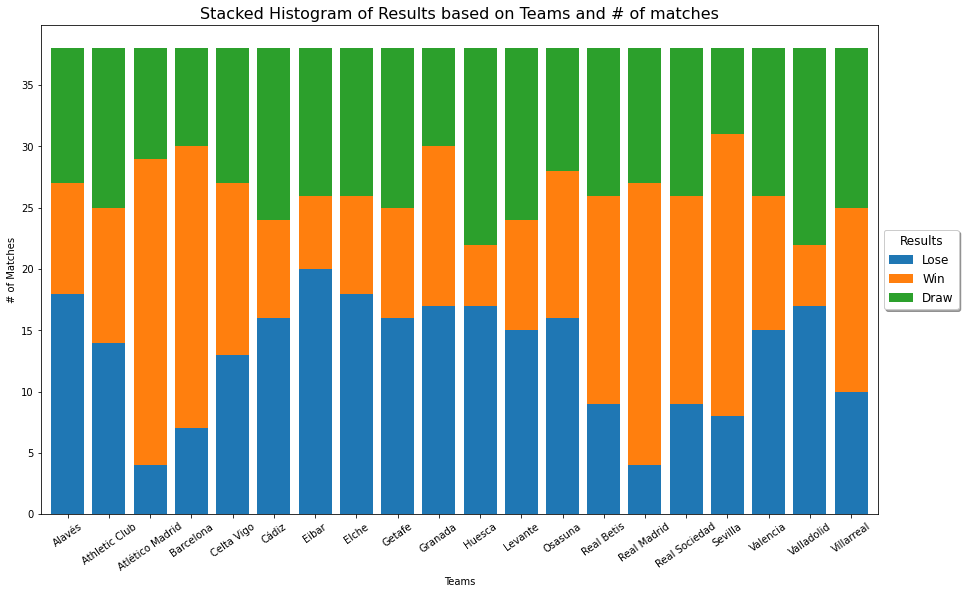

In [62]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


In [63]:
# index teams 
set_of_teams = set(df_versus["Team"])
team_index = {}
i=1
for team in set_of_teams : 
    team_index[team]=i
    i+=1
team_index

{'Levante': 1,
 'Granada': 2,
 'Eibar': 3,
 'Valladolid': 4,
 'Real Sociedad': 5,
 'Real Betis': 6,
 'Barcelona': 7,
 'Sevilla': 8,
 'Valencia': 9,
 'Atlético Madrid': 10,
 'Alavés': 11,
 'Huesca': 12,
 'Villarreal': 13,
 'Cádiz': 14,
 'Athletic Club': 15,
 'Celta Vigo': 16,
 'Elche': 17,
 'Real Madrid': 18,
 'Getafe': 19,
 'Osasuna': 20}

In [64]:
# update the database considering the indexes of teams : 
teams = df_versus["Team"]
opponent_teams = df_versus["Opponent_Team"]
team_indexes = []
opponent_team_indexes = []
for team in teams : 
    team_indexes.append(team_index[team])
for team in opponent_teams : 
    opponent_team_indexes.append(team_index[team])
df_versus["Team"] = pd.DataFrame(np.array(team_indexes))
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_team_indexes))

df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,11,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,1.0,0.0,0.0,...,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1,1
1,Alavés_vs_Athletic_Club,2020-10-04,15,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,11,10,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,0.0,0.0,0.0,0.0,...,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,10,11,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,2.0,2.0,0.0,0.0,...,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1,0
4,Alavés_vs_Barcelona,2020-10-31,11,7,"Estadio de Mendizorroza, Vitoria-Gasteiz",0.0,1.0,0.0,0.0,0.0,...,222.0,24.0,10.0,25.0,74.166667,74.166667,29.666667,4.133333e+06,2,1


In [65]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

Data Processing : 

In [66]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [67]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Opponent_Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)

df_versus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Match                       760 non-null    object 
 1   Date                        760 non-null    object 
 2   Team                        760 non-null    int64  
 3   Opponent_Team               760 non-null    int64  
 4   Stadium                     760 non-null    object 
 5   Crowd                       760 non-null    float64
 6   Gls                         760 non-null    float64
 7   Ast                         760 non-null    float64
 8   PK                          760 non-null    float64
 9   PKatt                       760 non-null    float64
 10  Sh                          760 non-null    float64
 11  SoT                         760 non-null    float64
 12  CrdY                        760 non-null    float64
 13  CrdR                        760 non

In [68]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks",'Potential','Overall Rating','Value','Age_y'])
df_versus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Match                       760 non-null    object 
 1   Date                        760 non-null    object 
 2   Team                        760 non-null    int64  
 3   Opponent_Team               760 non-null    int64  
 4   Stadium                     760 non-null    object 
 5   Crowd                       760 non-null    float64
 6   Results                     760 non-null    int64  
 7   Home/Away                   760 non-null    int64  
 8   last_3_avrg_Gls             740 non-null    float64
 9   avrg_Gls                    740 non-null    float64
 10  last_3_avrg_Ast             740 non-null    float64
 11  avrg_Ast                    740 non-null    float64
 12  last_3_avrg_PK              740 non-null    float64
 13  avrg_PK                     740 non

In [69]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

X = df_versus.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_versus['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
acc_random = []
acc_KNN = []
acc_logistic = []
acc_svm = []
for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("Random Forest : ", np.array(acc_random).mean())
print("KNN : ",np.array(acc_KNN).mean())
print("Logistic Regression : ",np.array(acc_logistic).mean())
print("SVM : ", np.array(acc_svm).mean())


Random Forest :  0.42155921052631584
KNN :  0.40744078947368423
Logistic Regression :  0.34523026315789473
SVM :  0.43035526315789474


In [70]:
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# clf_logistic = LogisticRegression()
# clf_random = RandomForestClassifier()
# clf_KNN = KNeighborsClassifier()
# clf_svm = svm.SVC()


X = df_versus.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_versus['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# acc_random = []
# acc_KNN = []
# acc_logistic = []
# acc_svm = []

#Splitting the dataset in train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

#Feature scaling
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Creating a model array variable
models = [LogisticRegression(max_iter= 1000, multi_class = 'multinomial'),
RandomForestClassifier(), svm.SVC(), KNeighborsClassifier(), GradientBoostingClassifier()]

names = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Gradient Boost']

#Running all tentative models and compute accuracies and elapsed times.
for model, name in zip(models, names):
    start = time.time()
    scores = cross_val_score(model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(name, ":", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), " - Elapsed time: ", time.time() - start)

Logistic Regression : 0.440, +- 0.036  - Elapsed time:  0.17509245872497559
Random Forest : 0.436, +- 0.028  - Elapsed time:  0.9195454120635986
SVM : 0.423, +- 0.034  - Elapsed time:  0.07175469398498535
KNN : 0.417, +- 0.038  - Elapsed time:  0.039876461029052734
Gradient Boost : 0.389, +- 0.037  - Elapsed time:  4.312976360321045


 Clf result : 0.452, +/- 0.035 N_features : 5
 Clf result : 0.446, +/- 0.030 N_features : 6
 Clf result : 0.444, +/- 0.041 N_features : 7
 Clf result : 0.444, +/- 0.045 N_features : 8
 Clf result : 0.446, +/- 0.047 N_features : 9
 Clf result : 0.444, +/- 0.045 N_features : 10
 Clf result : 0.436, +/- 0.042 N_features : 11
 Clf result : 0.436, +/- 0.042 N_features : 12
 Clf result : 0.439, +/- 0.040 N_features : 13
 Clf result : 0.438, +/- 0.042 N_features : 14
 Clf result : 0.439, +/- 0.039 N_features : 15
 Clf result : 0.442, +/- 0.039 N_features : 16
 Clf result : 0.451, +/- 0.031 N_features : 17
 Clf result : 0.457, +/- 0.033 N_features : 18
 Clf result : 0.456, +/- 0.027 N_features : 19
 Clf result : 0.426, +/- 0.038 N_features : 20
 Clf result : 0.429, +/- 0.040 N_features : 21
 Clf result : 0.421, +/- 0.033 N_features : 22
 Clf result : 0.426, +/- 0.034 N_features : 23
 Clf result : 0.424, +/- 0.037 N_features : 24
 Clf result : 0.426, +/- 0.033 N_features : 25
 Clf result : 0.43

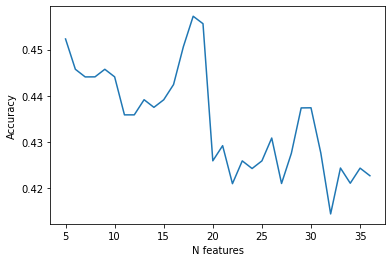

In [71]:
from sklearn.feature_selection import RFE

#As logistic regression obtained the highest overall accuracy, we will prroceed further to experiment with it to optimize our results

acc_results = []
n_features = []

#Selecting LogReg as the best classifier for our data
clf = LogisticRegression(max_iter =2000, multi_class = 'multinomial')

#Implementing recursive feature elimination on 
for i in range(5, len(X.columns)):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, Y)
    X_temp = rfe.transform(X)

    np.random.seed(2022)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,Y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +/- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [72]:
X.head()

,Team,Opponent_Team,Home/Away,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,11,15,1,0.666667,0.500000,0.333333,0.250000,0.000000,0.000000,0.000000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,15,11,0,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
2,11,10,1,1.666667,0.875000,1.000000,0.500000,0.333333,0.187500,0.666667,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
3,10,11,0,0.666667,1.857143,0.666667,1.500000,0.000000,0.142857,0.000000,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
4,11,7,1,1.333333,0.714286,1.000000,0.571429,0.000000,0.000000,0.333333,...,17.333333,16.571429,75.625000,75.672052,73.577381,73.239229,27.773810,27.356293,5.222619e+06,5.460282e+06
